In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_data=pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset
data_df=pd.merge(clinical_data,mouse_data,how="outer",on="Mouse ID")

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_data=data_df.groupby(["Drug", "Timepoint"])
mean_vol=grouped_data["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
df_1=pd.DataFrame({"Tumor Volume (mm3)":mean_vol})
# Preview DataFrame
df_1.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
grouped_data=data_df.groupby(["Drug", "Timepoint"])
sem_vol=grouped_data["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
df_2=pd.DataFrame({"Tumor Volume (mm3)":sem_vol})
# Preview DataFrame
df_2.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frame
df_3=df_1.reset_index().pivot("Timepoint", "Drug", "Tumor Volume (mm3)")

# Preview that Reformatting worked
df_3.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
means=list(df_3["Capomulin"])
x_axis=list(df_3.index)
sem=sem_vol["Capomulin"]
means_1=list(df_3["Infubinol"])
sem_1=sem_vol["Infubinol"]
means_2=list(df_3["Ketapril"])
sem_2=sem_vol["Ketapril"]
means_3=list(df_3["Placebo"])
sem_3=sem_vol["Placebo"]

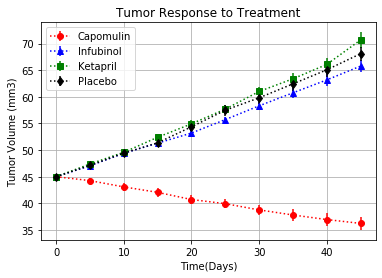

In [6]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

ax.errorbar(x_axis, means, yerr=sem, color="r",marker="o",label="Capomulin",linestyle=":")
ax.errorbar(x_axis, means_1,yerr=sem_1,color="b",marker="^",label='Infubinol',linestyle=":")
ax.errorbar(x_axis, means_2, yerr=sem_2, color="g",marker="s",label="Ketapril",linestyle=":")
ax.errorbar(x_axis, means_3, yerr=sem_3, color="k",marker="d",label="Placebo",linestyle=":")

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time(Days)")
ax.set_ylabel("Tumor Volume (mm3)")
ax.legend()
ax.grid()
# Save the Figure

# Show the Figure
plt.show()

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met=grouped_data["Metastatic Sites"].mean()
# Convert to DataFrame
df_4=pd.DataFrame({"Metastatic Sites":mean_met})
# Preview DataFrame
df_4.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_met=grouped_data["Metastatic Sites"].sem()
# Convert to DataFrame
df_5=pd.DataFrame({"Metastatic Sites":sem_met})
# Preview DataFrame
df_5.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frame
df_6=df_4.reset_index().pivot(index="Timepoint",columns= "Drug")["Metastatic Sites"]

# Preview that Reformatting worked
df_6.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
means_gra=list(df_6["Capomulin"])
x_axis=list(df_3.index)
sem_gra=sem_met["Capomulin"]
means_gra_1=list(df_6["Infubinol"])
sem_gra_1=sem_met["Infubinol"]
means_gra_2=list(df_6["Ketapril"])
sem_gra_2=sem_met["Ketapril"]
means_gra_3=list(df_6["Placebo"])
sem_gra_3=sem_met["Placebo"]

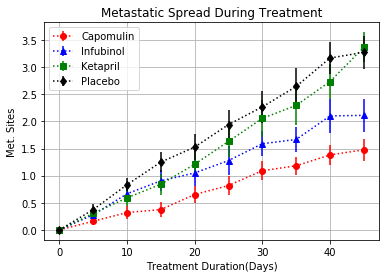

In [11]:
# Generate the Plot (with Error Bars)
fig, ax_1 = plt.subplots()

ax_1.errorbar(x_axis,means_gra , yerr=sem_gra, color="r",marker="o",label="Capomulin",linestyle=":")
ax_1.errorbar(x_axis,means_gra_1,yerr= sem_gra_1,color="b",marker="^",label='Infubinol',linestyle=":")
ax_1.errorbar(x_axis,means_gra_2 , yerr=sem_gra_2, color="g",marker="s",label="Ketapril",linestyle=":")
ax_1.errorbar(x_axis,means_gra_3 , yerr=sem_gra_3, color="k",marker="d",label="Placebo",linestyle=":")

ax_1.set_title("Metastatic Spread During Treatment")
ax_1.set_xlabel("Treatment Duration(Days)")
ax_1.set_ylabel("Met. Sites")
ax_1.legend()
ax_1.grid()

# Save the Figure

# Show the Figure
plt.show()

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mou_cou=grouped_data["Mouse ID"].count()
# Convert to DataFrame
df_7=pd.DataFrame({"Mouse Count":mou_cou})
# Preview DataFrame
df_7.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [22]:
# Minor Data Munging to Re-Format the Data Frame
df_8=df_7.reset_index().pivot("Timepoint", "Drug")["Mouse Count"]

# Preview that Reformatting worked
df_8

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [18]:
y=[]
for row in df_8["Capomulin"]:
    y.append((row/df_8.iloc[0,0])*100)
    
y_1=[]
for row in df_8["Infubinol"]:
    y_1.append((row/df_8.iloc[0,2])*100)
    
y_2=[]
for row in df_8["Ketapril"]:
    y_2.append((row/df_8.iloc[0,3])*100)
    
y_3=[]
for row in df_8["Placebo"]:
    y_3.append((row/df_8.iloc[0,5])*100)
    


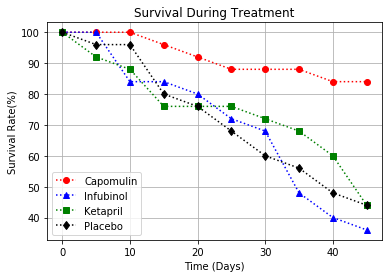

In [19]:
# Generate the Plot (Accounting for percentages)
fig, ax_2 = plt.subplots()

ax_2.plot(x_axis, y ,color="r",marker="o",label="Capomulin",linestyle=":")
ax_2.plot(x_axis, y_1,color="b",marker="^",label='Infubinol',linestyle=":")
ax_2.plot(x_axis,y_2, color="g",marker="s",label="Ketapril",linestyle=":")
ax_2.plot(x_axis,y_3, color="k",marker="d",label="Placebo",linestyle=":")

ax_2.set_title("Survival During Treatment")
ax_2.set_xlabel("Time (Days)")
ax_2.set_ylabel("Survival Rate(%)")
ax_2.legend()
ax_2.grid()
# Save the Figure

# Show the Figure
plt.show()

In [20]:
# Calculate the percent changes for each drug
per_change=((df_3.iloc[-1,:]-df_3.iloc[0,:])/df_3.iloc[0,:])*100
# Display the data to confirm
per_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

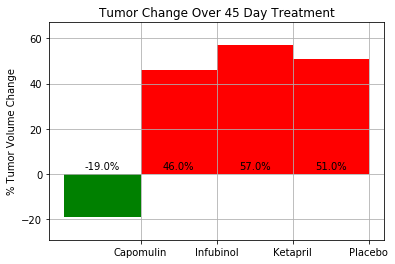

In [21]:
# Store all Relevant Percent Changes into a Tuple
change_tuple=round(per_change[0]),round(per_change[2]),round(per_change[3]),round(per_change[5])
# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
meds=["Capomulin","Infubinol","Ketapril","Placebo"]
x_axis_3=np.arange(0,len(change_tuple))
tick_locations=[]
for x in x_axis_3:
    tick_locations.append(x) 
    
    
plt.grid(zorder=0)
rects=plt.bar(x_axis_3,change_tuple,zorder=1,align="edge",width=-1,alpha=1,color=["g","r","r","r"])
plt.xticks(tick_locations,meds)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.ylim(min(change_tuple)-10,max(change_tuple)+10)

# Use functions to label the percentages of changes
def autolabel(rects, xpos='center'):

    ha = {'center': 'center'}
    offset = {'center': 0}

    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2,0),
                    xytext=(offset[xpos]*3,3), 
                    textcoords="offset points",  
                    ha=ha[xpos], va='bottom')



# Call functions to implement the function calls
autolabel(rects, "center")
# Save the Figure


# Show the Figure
fig.show()